In [1]:
import sys
sys.path.append('../')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rnaseq = pd.read_csv("data/geo/hts-geo-series-human.csv")
rnaseq["Capture Type"] = "RNA-Seq"
microarray = pd.read_csv("data/geo/array-geo-series-human.csv")
microarray["Capture Type"] = "MicroArray"

In [3]:
d = microarray.append(rnaseq)

In [4]:
d["Release Date"] = pd.to_datetime(d["Release Date"])
d["Year"] = d["Release Date"].dt.year

In [5]:
d = d[d["Year"] > 2001]
d = d[d["Year"] < 2018]

In [6]:
d["Title"] = d["Title"].str.lower()
singlecell = d["Title"].str.contains("single-cell")
singlecell |= d["Title"].str.contains("single cell")
singlecell.sum()

195

In [7]:
d["Isolation"] = ["Single Cell" if x else "Multi Cell" for x in singlecell]

In [8]:
dsc = d[singlecell]
dmc = d[singlecell == False]

In [9]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].median().unstack("Capture Type")
r

Capture Type  MicroArray  RNA-Seq
Year                             
2002                 5.0      NaN
2003                 7.0      NaN
2004                18.0      NaN
2005                20.0      NaN
2006                19.0      NaN
2007                17.0      NaN
2008                15.0     18.0
2009                16.0      4.0
2010                15.0     14.0
2011                16.0     10.0
2012                15.0     10.0
2013                14.0      9.0
2014                14.0     11.0
2015                15.0     12.0
2016                12.0      2.0
2017                12.0     12.0

In [10]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].count().unstack("Capture Type")
r

Capture Type  MicroArray  RNA-Seq
Year                             
2002                27.0      NaN
2003               178.0      NaN
2004               250.0      NaN
2005               399.0      NaN
2006               522.0      NaN
2007               687.0      NaN
2008               935.0      6.0
2009              1185.0      7.0
2010              1471.0     37.0
2011              1863.0     91.0
2012              2043.0    161.0
2013              2208.0    282.0
2014              2262.0    559.0
2015              2482.0    697.0
2016              2173.0   2183.0
2017              2061.0   1681.0

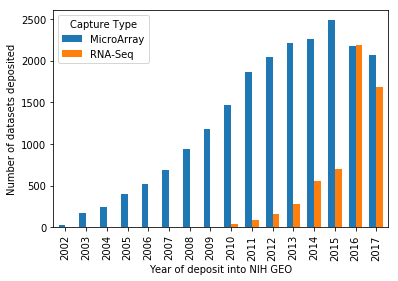

In [11]:
ax = r.plot.bar(stacked=False, width=.66);
ax.set_ylabel("Number of datasets deposited");
ax.set_xlabel("Year of deposit into NIH GEO");

In [12]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].sum().unstack("Capture Type")
r

Capture Type  MicroArray  RNA-Seq
Year                             
2002               639.0      NaN
2003              3665.0      NaN
2004              8703.0      NaN
2005             17357.0      NaN
2006             23614.0      NaN
2007             28743.0      NaN
2008             37238.0    191.0
2009             51119.0   1453.0
2010             65338.0   1792.0
2011             81473.0   1753.0
2012             85445.0   2696.0
2013             96496.0   4855.0
2014            105159.0  21639.0
2015            109783.0  22001.0
2016            104131.0  41194.0
2017             82084.0  53021.0

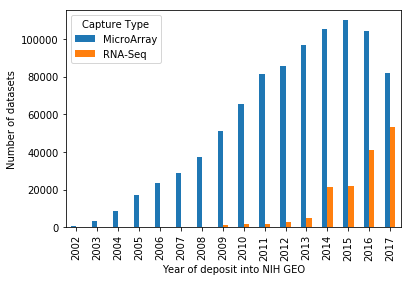

In [13]:
ax = r.plot.bar(stacked=False);
ax.set_ylabel("Number of datasets");
ax.set_xlabel("Year of deposit into NIH GEO");

In [14]:
stats = d.groupby(d["Release Date"].dt.year)["Sample Count"].count()

In [15]:
stats.index

Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017],
           dtype='int64', name=u'Release Date')

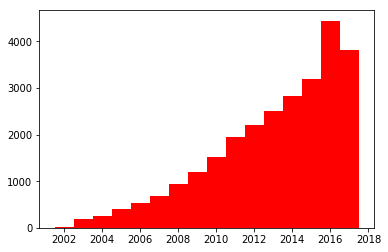

In [16]:
rects2 = plt.bar(stats.index, stats.as_matrix(), 1, color='red')

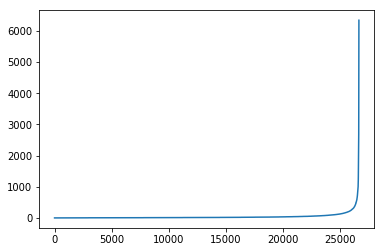

In [17]:
plt.plot(np.sort(d["Sample Count"]))

In [18]:
d["Sample Count"].mean()

42.657534246575345

In [19]:
d = pd.read_csv("data/geo/array-geo-series-human.csv")

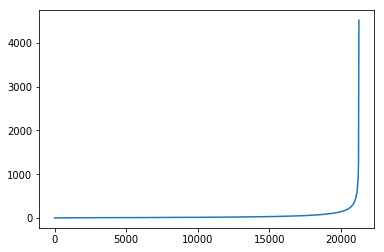

In [20]:
plt.plot(np.sort(d["Sample Count"]))

In [21]:
d["Sample Count"].mean()

43.39351742955262

In [22]:
d["Sample Count"].shape

(21257,)